In [1]:
from sklearn.decomposition import PCA
import seaborn as sns
import altair as alt
import pandas as pd

In [2]:
iris = sns.load_dataset("iris")
type(iris)

pandas.core.frame.DataFrame

In [3]:
cols = iris.columns
data = iris[cols[:-1]].values # convert the data to a NumPy array for sklearn

pca = PCA(2)
projected = pca.fit_transform(data)

In [4]:
df = pd.DataFrame(projected, columns=['x','y'])

In [5]:
df = pd.concat([iris,df], axis=1)

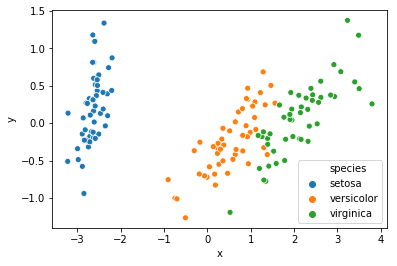

In [6]:
sns.scatterplot('x','y',hue='species', data=df)

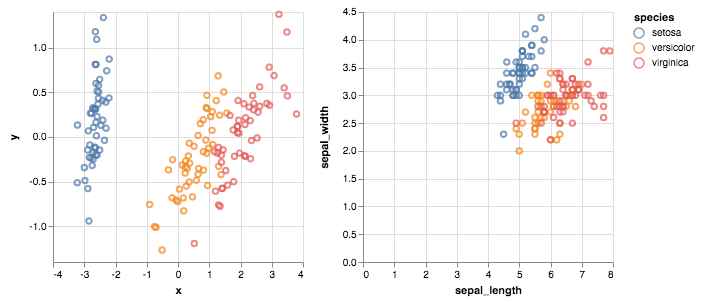

In [7]:
# create side-by-side charts and highlight points within the plot using mouse
brush = alt.selection_interval()

chart = alt.Chart(df).mark_point().encode(
    color=alt.condition(brush, 'species:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart2 = chart.encode(x='x', y='y') | chart.encode(x='sepal_length:Q', y='sepal_width')
chart2.save('my_plot.html')
chart2